In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

In [145]:
data = pd.read_csv('Dataset_of_Diabetes.csv')
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [146]:
data['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [147]:
data = data.replace(['N', 'P', 'Y' ], [1, 2, 3])
data = data.replace(['N ', 'Y ' ], [1, 3])
del data['ID']
del data['No_Pation']
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1


In [149]:
print('Número de datos = {}'.format(len(data)))

Número de datos = 1000


### Predictores:
* **Género** → Gender
* **Edad** → AGE
* **Urea** →  Urea
* **Proporción de creatinina** →  Cr
* **Hemoglobina glicosilada** →  HbA1c
* **Colesterol** →  Chol
* **Trigliceridos** →  TG
* **Colesterol "bueno"** →  HDL
* **Colesterol "malo"** →  LDL
* **Colesterol-2 "malo"** →  VLDL
* **Indice de masa corporal**→  BMI
* **Clase** →  CLASS

In [150]:
predictors = list(data.columns[:-1])
X = data[predictors]
y = data['CLASS']

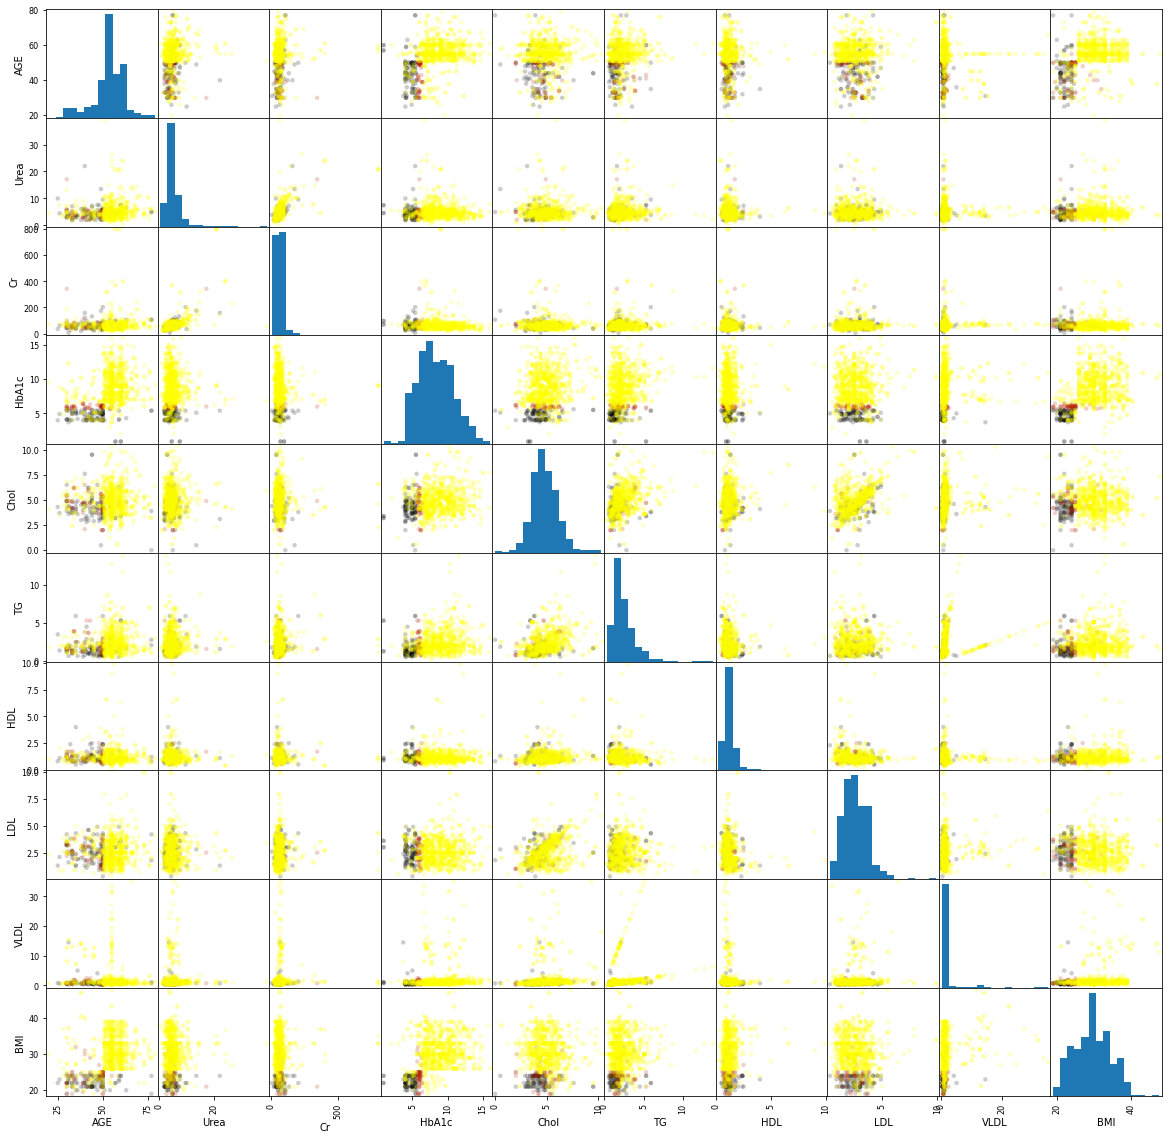

In [151]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter_matrix(X, c=y, marker = 'o', s=20, hist_kwds={'bins':15}, alpha=0.2, figsize=(20, 20), diagonal="hist", cmap=cmap);

In [152]:
Statistics = data.iloc[: , :-1].describe()
Statistics

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [153]:
Statistics['BMI']

count    1000.000000
mean       29.578020
std         4.962388
min        19.000000
25%        26.000000
50%        30.000000
75%        33.000000
max        47.750000
Name: BMI, dtype: float64

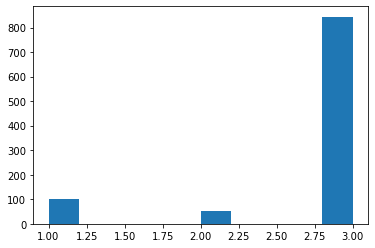

In [154]:
_ = plt.hist(data["CLASS"])

In [155]:
print('Proporción de pacientes sin Diabetes = {}'.format(len(data[data['CLASS']==1])/1000))
print('Proporción de pacientes con Prediabetes = {}'.format(len(data[data['CLASS']==2])/1000))
print('Proporción de pacientes con Diabetes = {}'.format(len(data[data['CLASS']==3])/1000))

Proporción de pacientes sin Diabetes = 0.103
Proporción de pacientes con Prediabetes = 0.053
Proporción de pacientes con Diabetes = 0.844


In [ ]:
_ = plt.hist(data["CLASS"])